# 양자 폭탄 실험: 관측없이 폭탄인지 알아내는 법

Elitzur–Vaidman bomb tester

([파파고](https://papago.naver.com/) 번역 제공)

안녕하세요! 저는 옥스포드 대학에서 양자 정보의 기초를 연구하는 박사과정 학생 마리아입니다. 박사학위 연구의 일환으로, 저는 양자 사고 실험을 이해하는 일을 하고 있습니다. 이 주피터 노트북에서는 양자폭탄 테스터를 만드는 방법과 양자컴퓨터에서 "양자 지뢰 찾기" 게임을 하는 방법을 알려드리겠습니다. 이 주제에 대한 자세한 내용은 Qiskit 블로그(https://medium.com/qiskit/building-quantum-bomb-testers-and-other-thought-experiments-with-quantum-computers-c160060fdde4) 에 있는 제 글을 읽어보십시오.

블로그를 읽어보신 분들을 위해 양자폭탄테스터 문제를 간단히 상기시켜드리겠습니다.

상자가 주어졌는데 안에 무엇이 있는지 볼 수 없다고 상상해 보세요. 네가 아는건 그게 비어있거나, 아니면 매우 민감한 폭탄이 들어있거나 둘 중 하나야. 이 폭탄이 광자 하나라도 맞으면 폭발할 거예요. 당신의 도전은 폭발하지 않고 상자 안에 폭탄이 있는지 없는지를 알아내는 것입니다.

전통적으로 이것은 불가능합니다. 폭탄을 탐지하려는 순간 탐지기와 상호 작용하여 폭발합니다. 그러나 1993년 양자물리학자인 Avshalom Elitzur와 Lev Vaidman은 우리가 보지 않고도 폭탄을 볼 수 있는 양자폭탄 시험기를 제안했다.

이제 어떻게 이 논란이 많은 폭탄 실험기를 간단한 양자 회로로 보여줄 수 있는지 보여드리겠습니다. Qiskit을 사용하여 여러분 자신을 실험할 수 있습니다!

![](images/01.png)

우리의 광자를 나타내는 큐빗과 우리의 폭탄을 나타내는 큐빗으로 시작합시다.

광자가 빔 분할기에 도달하면 두 경로의 중첩으로 들어갑니다. 이것은 |0> 상태에서 |0> + |1]로 큐비트를 변환하는 아다마르 게이트와 같다.

그럼 우리 폭탄은 C-NOT 게이트로 표현될 수 있겠군 광자 큐비트가 0이면 폭탄 큐비트는 폭발하지 않은 0 상태를 유지한다. 광자 큐비트가 1이면 폭탄 큐비트가 1로 뒤집혀 폭탄이 폭발한 것이다.

마지막으로 우리의 두 번째 빔플리터는 광자 큐비트의 또 다른 아다마드 게이트일 뿐입니다. 회로를 돌리면 4가지 결과를 볼 수 있습니다. 모두 1/4 확률로 말이죠. 우리가 원하는 것은 광자 큐비트가 1인데 폭탄 큐비트가 0이면 C-NOT 게이트가 있었다는 것을 알 수 있지만 폭탄 큐비트가 뒤집히지 않은 경우입니다.

https://www.youtube.com/watch?v=KC_1Ui_MArc

<img src="images/05.png">

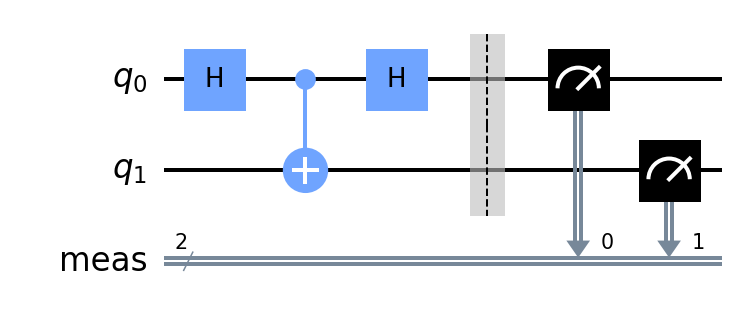

In [1]:
# 기본 폭탄 테스터 회로
from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl', scale=2)

<img src="images/02.png" width="400px">

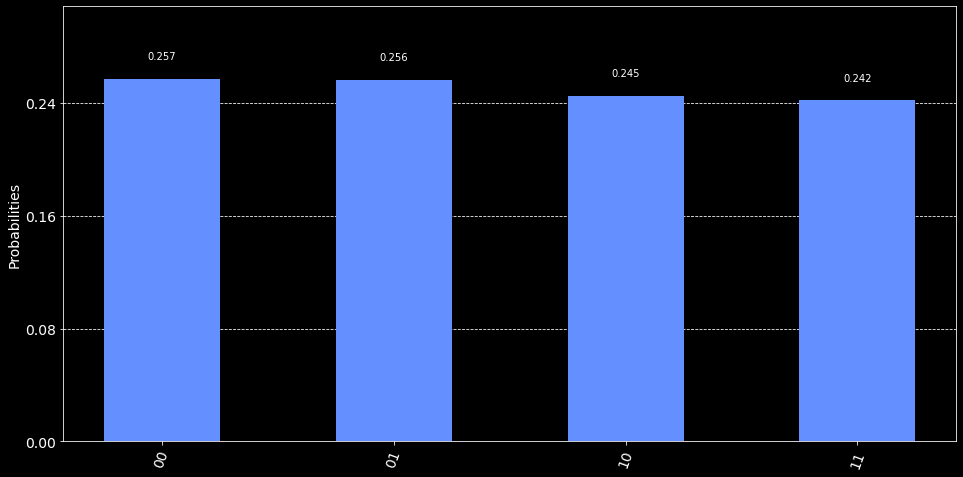

In [2]:
# 기본 폭탄 테스터 회로 실행
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
plt.style.use('dark_background')

simulator = QasmSimulator()

job = simulator.run(bomb_tester, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester)

plot_histogram(counts, figsize=(16, 8))

## Quantum Zeno Effect

우리는 "퀀텀 제노 효과"를 사용하여 폭탄 테스터를 100% 효과적으로 만들 수 있습니다. 우리는 빔플리터를 조절해서 매우 높은 반사율을 가지는데, 이것은 광자가 폭탄이 없는 경로에서 붕괴할 가능성이 매우 높다는 것을 의미합니다. 만약 우리가 같은 광자를 빔플리터를 통해 여러 번 보낸다면, 그 광자는 매번 반사 경로로 붕괴될 가능성이 높습니다. 그러나 만약 폭탄이 없다면, 광자의 상태는 빔플리터에 의해 완전히 전달될 때까지 서서히 변한다. 그래서 우리는 광자가 반사되면 폭발하지 않고 폭탄이 있다는 것을 알 수 있습니다.

우리는 x-회전 게이트로 가장 반사되는 빔플리터를 Qiskit로 코딩할 수 있다. 우리가 더 많은 주기를 더할수록, 우리는 폭발하지 않고 폭탄을 탐지할 가능성이 높아진다. 즉, 광자 큐비트는 변하지 않은 0이고 폭탄 큐비트는 항상 불발탄 0이다. 제 회로에서는 새로운 C-NOT 게이트를 사용하여 폭탄 테스터를 통과하는 광자를 여러 번 시뮬레이션합니다. 매번 폭탄이 폭발했는지 측정하고 큐비트를 0으로 재설정합니다.

<img src="images/04.png">

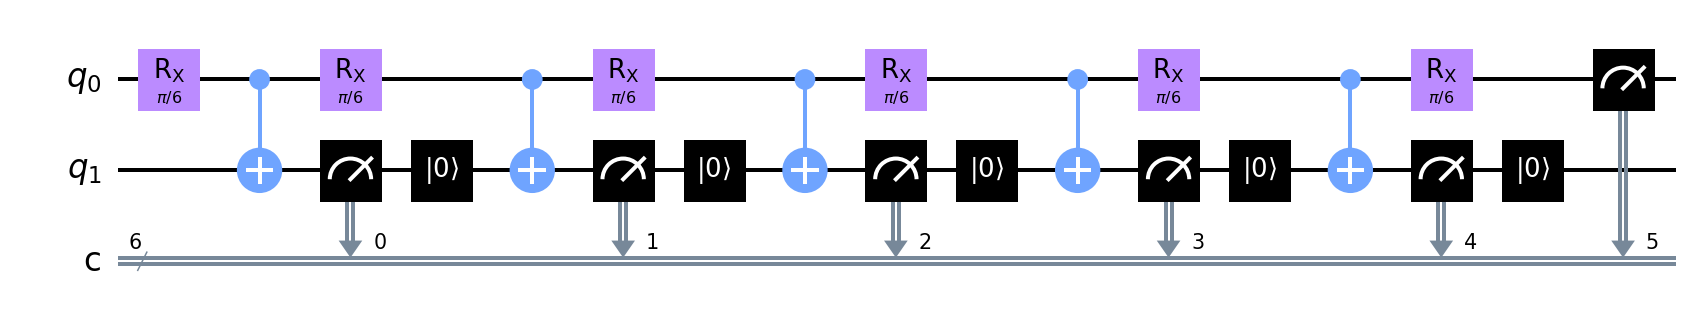

In [3]:
# 제노 폭탄 테스터 코드
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate

cycles = 6 # 광자를 미스터리 박스에 통과시키는 횟수. 높을수록 안전.
theta = np.pi/cycles # 양자 제노 효과를 만들기 위한 빔스플리터의 반사율

# 양자 회로 만들기
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# 여러 빔스플리터와 C-NOT 폭탄 연결
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# 마지막 빔스플리터 설치
zeno_tester.append(RXGate(theta), [qr[0]])

# 관측
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl', scale=2)

6개의 빔플리터로 이 폭탄테스터를 작동시키면 폭발 없이 폭탄을 탐지할 수 있는 2/3의 확률이 있습니다

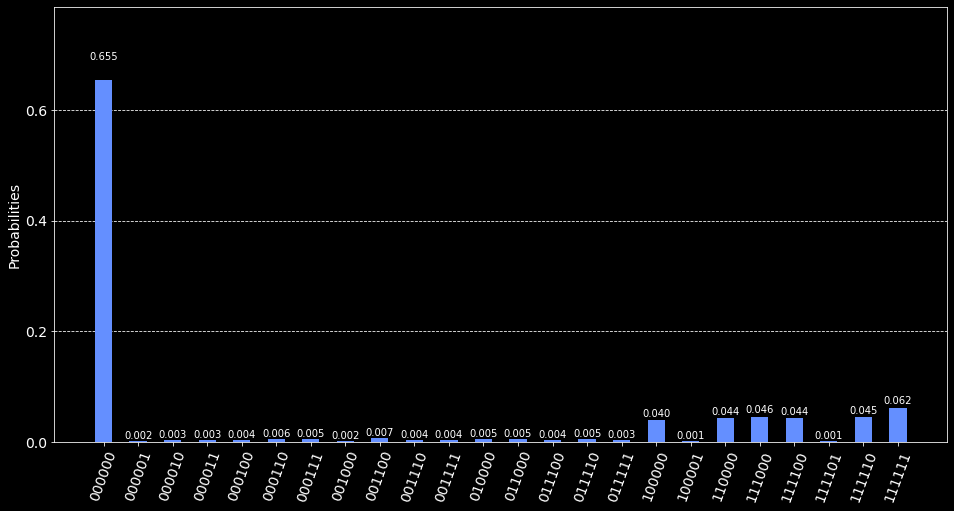

In [4]:
# 제노 폭탄 테스터 실행
zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts, figsize=(16, 8))

## Reference

- https://medium.com/qiskit/building-quantum-bomb-testers-and-other-thought-experiments-with-quantum-computers-c160060fdde4
- https://www.youtube.com/watch?v=fus1nJ6JaTk
- https://www.youtube.com/watch?v=KC_1Ui_MArc